In [1]:
import pandas as pd
file_path= 'C:/Users/ramya/OneDrive/Desktop/dataMining/student_data.csv'
df=pd.read_csv('C:/Users/ramya/OneDrive/Desktop/dataMining/student_data.csv')
df.head()

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


#TASK 1(b) LOGISTIC REGRESSION

C:\Users\ramya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


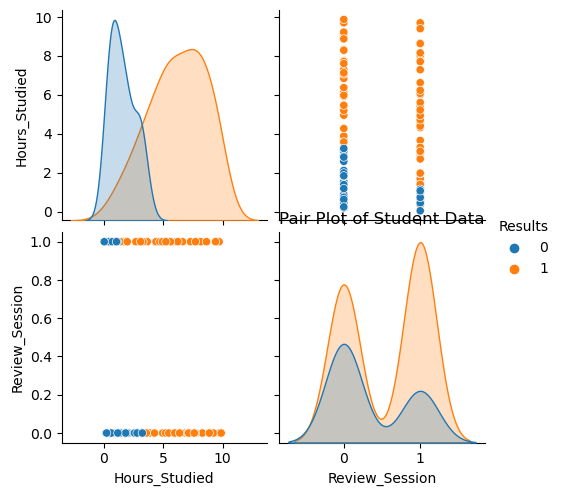

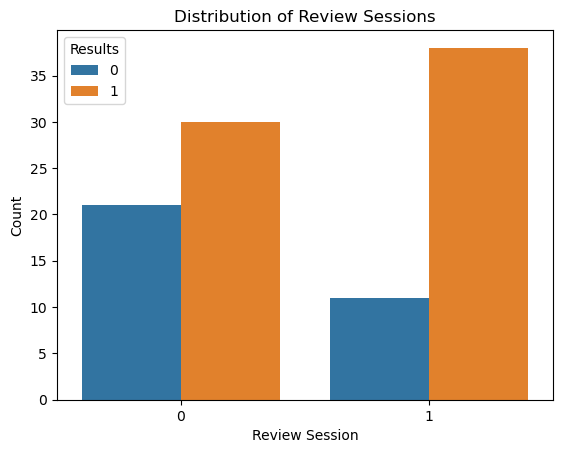

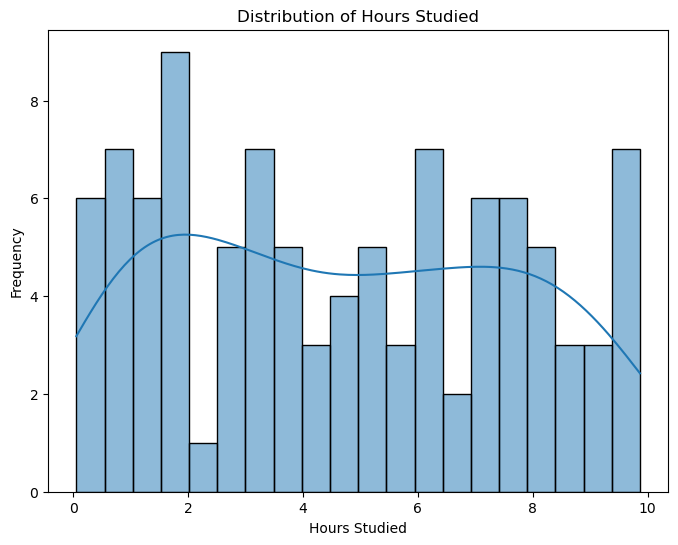

In [2]:
# (1) VISUALIZATIONS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a pair plot to visualize relationships between variables
sns.pairplot(df, hue="Results", diag_kind="kde")
plt.title("Pair Plot of Student Data")
plt.show()

# Create a bar plot to show the distribution of review sessions
sns.countplot(data=df,x="Review_Session", hue="Results")
plt.title("Distribution of Review Sessions")
plt.xlabel("Review Session")
plt.ylabel("Count")
plt.show()

# Create a histogram to visualize the distribution of hours studied
plt.figure(figsize=(8, 6))
sns.histplot(df["Hours_Studied"], kde=True, bins=20)
plt.title("Distribution of Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Frequency")
plt.show()


In [3]:
#(2) MODEL FITTING USINGB LOGISTIC REGRESSION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define your features (X) and target (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Split the data into a training and testing set
model = LogisticRegression()
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


Model Coefficients: [1.36499215 1.87733756]
Model Intercept: [-4.61182462]
AUC: 0.98


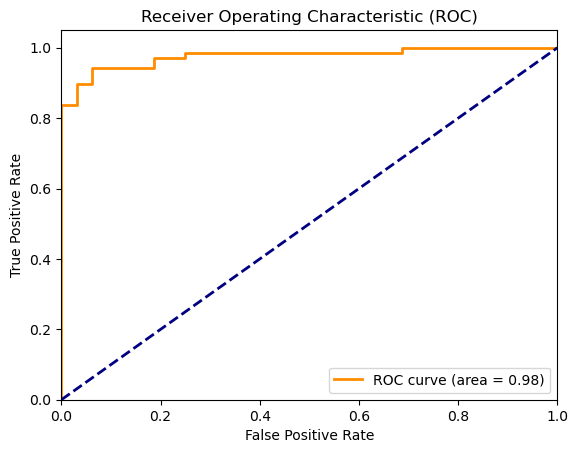

In [4]:
#(3) COOEFICIENTS AND PREFORMANCE METRICES (AUC SCORE AND ROC)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
coefficients = model.coef_[0]
intercept = model.intercept_
print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept}")

# Calculate AUC and plot ROC curve using the same dataset
y_prob = model.predict_proba(X)[:, 1]
auc_score = roc_auc_score(y, y_prob)
print(f"AUC: {auc_score:.2f}")

fpr, tpr, _ = roc_curve(y, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

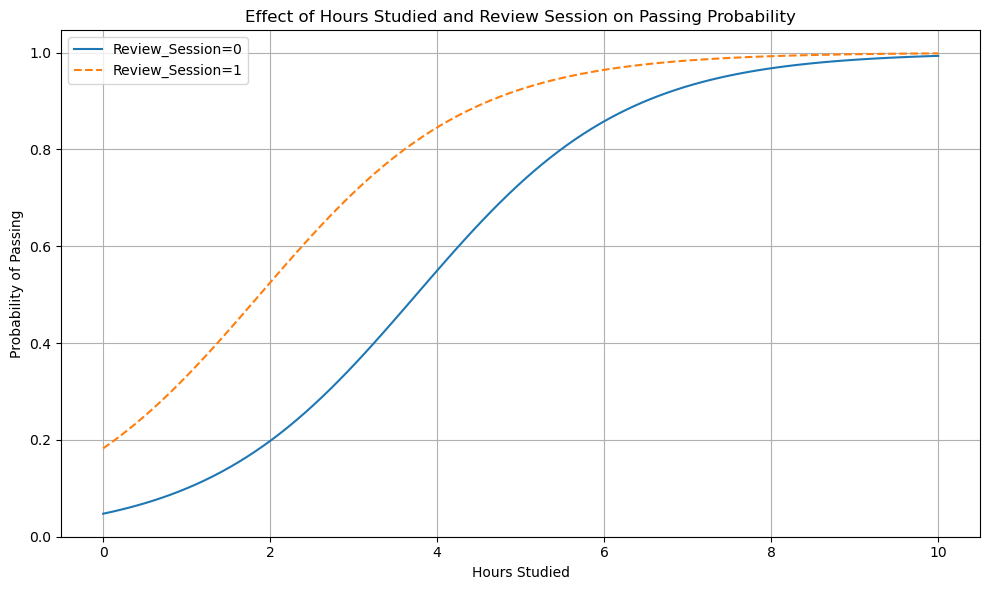

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the model
def log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

# Generate some data
hours_studied = np.linspace(0, 10, 100)

# Calculate log-odds and probabilities for both Review_Session=0 and Review_Session=1
log_odds_0 = log_odds(hours_studied, 0)
probability_0 = logistic_function(log_odds_0)

log_odds_1 = log_odds(hours_studied, 1)
probability_1 = logistic_function(log_odds_1)

# Plot the data
plt.figure(figsize=(10,6))

plt.plot(hours_studied, probability_0, label='Review_Session=0')
plt.plot(hours_studied, probability_1, label='Review_Session=1', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define your features (X) and target (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Split the data into a training and testing set
model = SVC(kernel='linear')
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display other evaluation metrics
print(classification_report(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.98      0.90      0.94        68

    accuracy                           0.92       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100

Confusion Matrix:
[[31  1]
 [ 7 61]]


In [11]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report

param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}

# Create an SVM model with an RBF kernel
svm = SVC(kernel='rbf')

# Initialize GridSearchCV with k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=kfold, scoring='accuracy',verbose=2)

# Perform grid search
grid_search.fit(X, y)

# Print the best hyperparameters and their corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best C:", best_params['C'])
print("Best Gamma:", best_params['gamma'])
print("Best Accuracy:", best_accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=